In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from cartopy import feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [107]:
pptn = xr.open_dataarray('D:\\Climate_Tutorial\\ERA5 DATASET\\precipitation_2018.nc')
pptn = pptn*1000
pptn

<xarray.DataArray 'tp' (time: 12, latitude: 81, longitude: 161)>
array([[[1.455843e-02, 1.455843e-02, ..., 0.000000e+00, 0.000000e+00],
        [1.266040e-02, 1.329370e-02, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [4.780697e+00, 4.531914e+00, ..., 1.673751e+00, 1.680080e+00],
        [4.352763e+00, 4.131202e+00, ..., 1.692109e+00, 1.495233e+00]],

       [[1.390150e+00, 1.254046e+00, ..., 3.797933e-03, 3.797933e-03],
        [1.159724e+00, 9.419583e-01, ..., 0.000000e+00, 1.076050e-02],
        ...,
        [1.452757e+01, 1.678941e+01, ..., 4.887680e+00, 5.166850e+00],
        [1.666534e+01, 1.852141e+01, ..., 4.571162e+00, 4.780064e+00]],

       ...,

       [[5.697273e-02, 4.367903e-02, ..., 0.000000e+00, 0.000000e+00],
        [4.937686e-02, 2.278946e-02, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [1.737688e+00, 1.680080e+00, ..., 5.672647e+00, 5.392211e+00],
        [1.632603e+00, 1.568032e+00, ..., 6.275298e+00, 6.088552e+00]],

       [[3.797933e-03, 3.

In [108]:
temp2 = temp.sel(longitude=np.arange(-20,18,0.5),latitude=np.arange(0,20,0.5), method='nearest')

## Generate the seasonal climatology

In [109]:
seas_temp2=temp2.groupby('time.season').mean('time') #this code gives the seasonal climatology

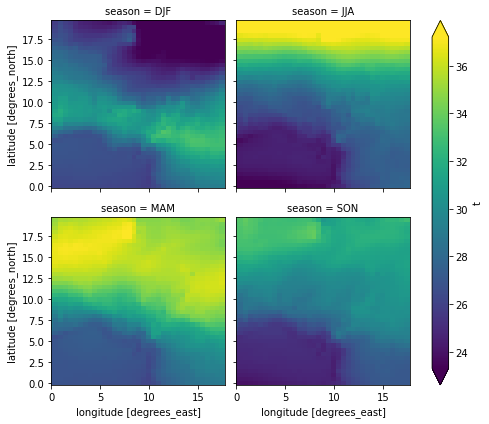

In [110]:
seas_temp2.plot(x='longitude',y='latitude',col='season', col_wrap=2, robust=True)

## Second Approach

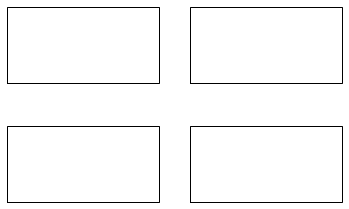

In [111]:
count=0
fig=plt.figure()
for seas in seas_temp2.season:
    count+=1
    ax=fig.add_subplot(2,2,count, projection=ccrs.PlateCarree())
    seas_temp2[seas_temp2.season==seas]

In [112]:
seas_temp2[seas_temp2.season==seas]

<xarray.DataArray 't' (season: 1, latitude: 40, longitude: 76)>
array([[[23.891287, 23.891287, ..., 27.060608, 27.071848],
        [24.116495, 24.116495, ..., 27.070547, 27.074442],
        ...,
        [33.228497, 33.228497, ..., 32.172924, 32.003906],
        [33.37805 , 33.37805 , ..., 32.642773, 32.91554 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.0 0.0 0.0 0.0 ... 16.0 16.5 17.0 17.5
  * latitude   (latitude) float32 0.0 0.5 1.0 1.5 2.0 ... 18.0 18.5 19.0 19.5
  * season     (season) object 'SON'

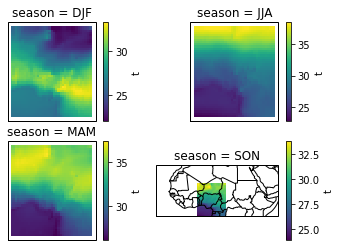

In [113]:
count=0
fig=plt.figure()
for seas in seas_temp2.season:
    count+=1
    ax=fig.add_subplot(2,2,count,projection=ccrs.PlateCarree())
    seas_temp2[seas_temp2.season==seas].plot()

ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([-25.25, 50.25, -0.25, 25.75])